### Food Security Indicators

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
food_security_indicators = pd.read_csv("../Food security indicators  - FAOSTAT_data_en_2-22-2024.csv")
food_security_indicators.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [3]:
# Checking for missing values
missing_values = food_security_indicators.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                36511
dtype: int64


In [4]:
# Handling missing values if any
food_security_indicators_cleaned = food_security_indicators.dropna(axis=0).reset_index(drop=True)
food_security_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,356,India,6121,Value,21049,Prevalence of low birthweight (percent),2020,2020,%,27.4,X,Figure from international organizations,The UNICEF-WHO low birthweight estimates are d...


In [5]:
# Handling missing values if any
food_security_indicators_cleaned = food_security_indicators.dropna(axis=1).reset_index(drop=True)
food_security_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2016,2016,%,12.1,X,Figure from international organizations
36508,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2017,2017,%,12.0,X,Figure from international organizations
36509,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2018,2018,%,12.0,X,Figure from international organizations
36510,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2019,2019,%,11.9,X,Figure from international organizations


### Converting Categorial colunm to numbers

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in food_security_indicators_cleaned.columns:
    if food_security_indicators_cleaned[col].dtype == 'object':
        food_security_indicators_cleaned[col] = label_encoder.fit_transform(food_security_indicators_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(food_security_indicators_cleaned), columns=food_security_indicators_cleaned.columns)


In [7]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990098,0.023810,0.0,0.116262,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990593,0.071429,0.0,0.116418,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991088,0.119048,0.0,0.116888,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991583,0.166667,0.0,0.117044,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992078,0.214286,0.0,0.117201,0.0,0.0


### Model Training and Evaluation

In [9]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']
food_security_indicators_selected = df_normalized[selected_features]


In [10]:
# Split the dataset into features (X) and target variable (y)
X = food_security_indicators_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Flag', 'Flag Description']]
y = food_security_indicators_selected['Value']


In [11]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990098,0.023810,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990593,0.071429,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991088,0.119048,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991583,0.166667,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992078,0.214286,0.0,0.0,0.0


In [12]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

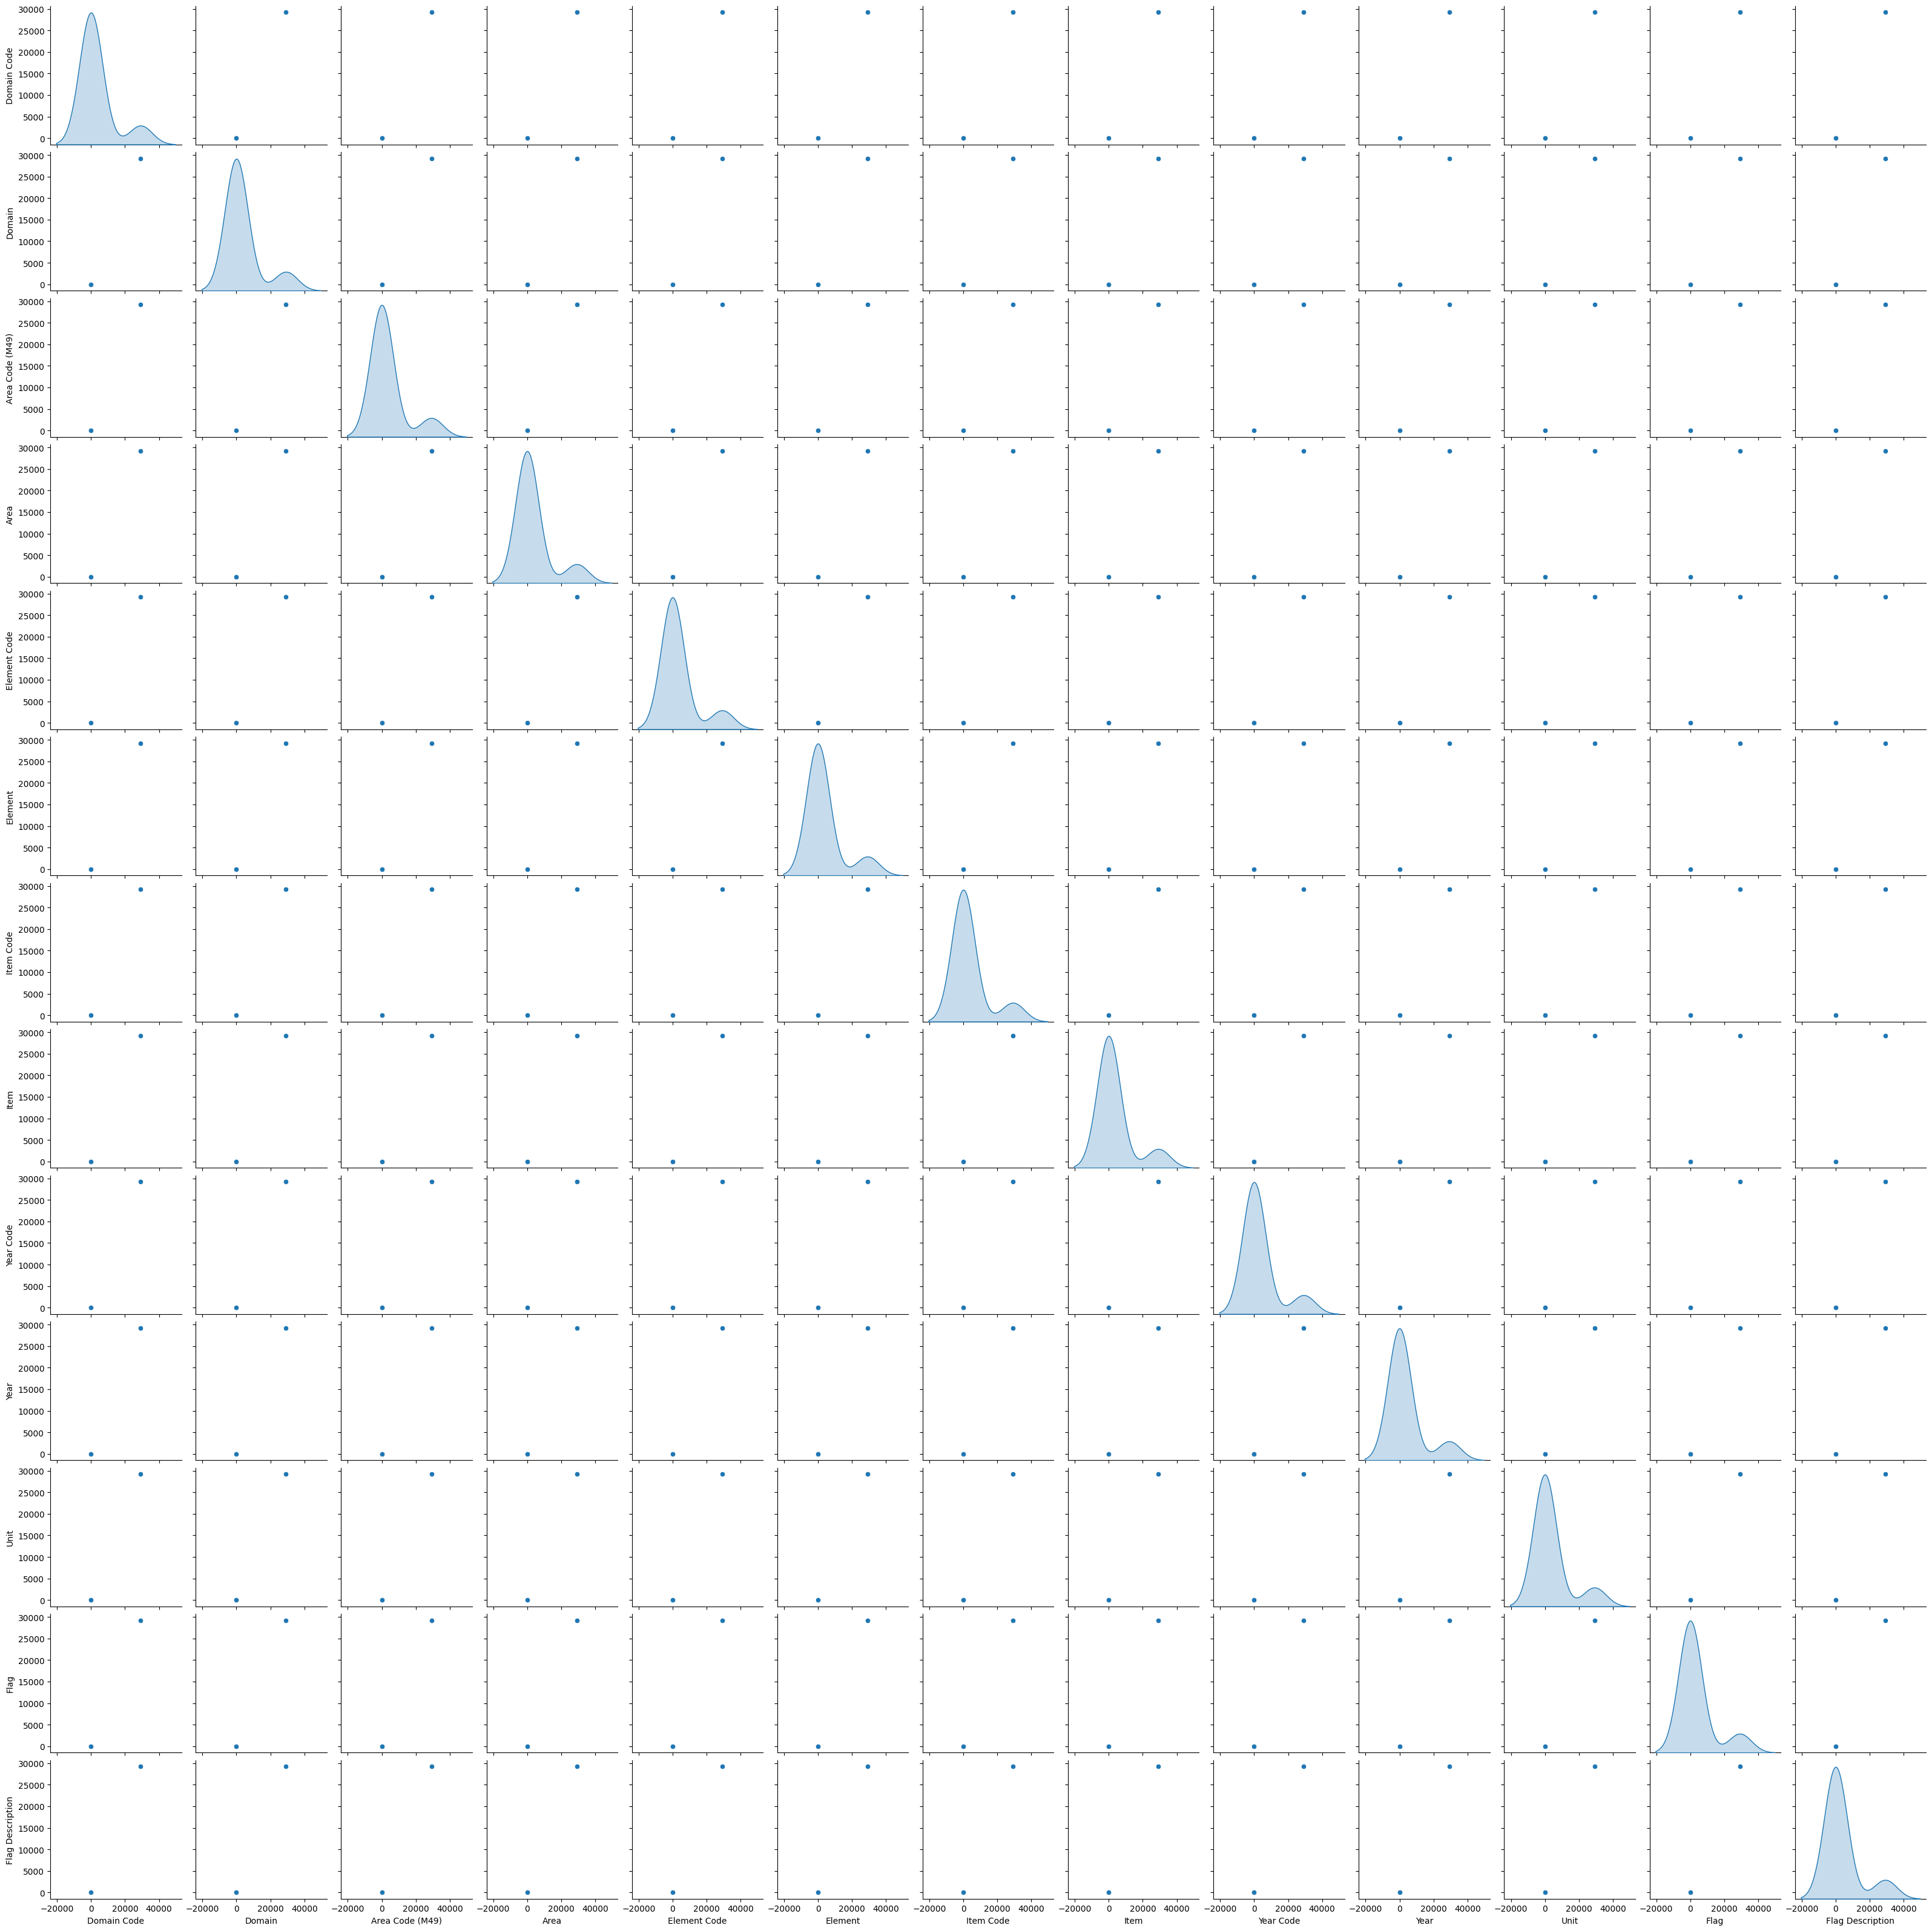

In [13]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 3.609352256896769e-05
Linear Regression Mean Absolute Error: 0.003153183022472697


In [16]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 8.906711263138261e-05
MLP Regression Mean Absolute Error: 0.006897561934781155


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

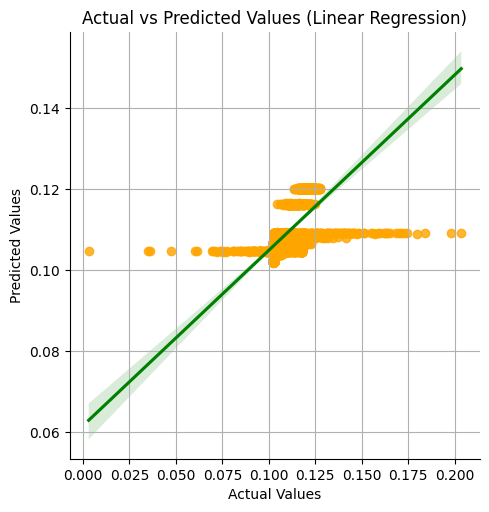

<Figure size 1000x600 with 0 Axes>

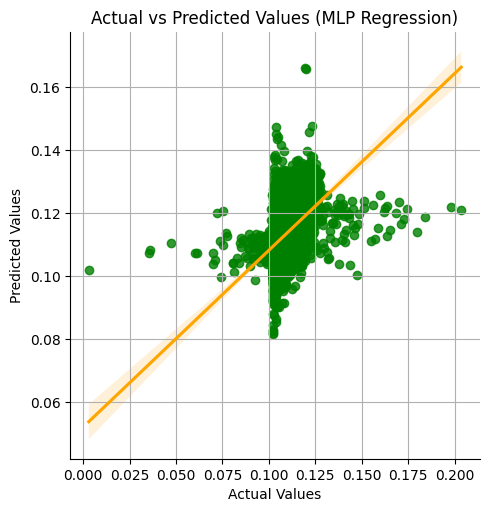

In [17]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


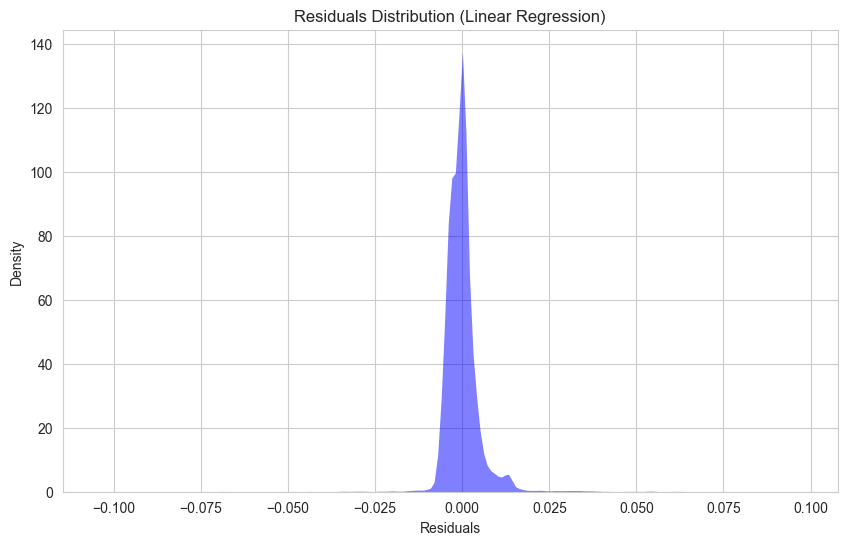

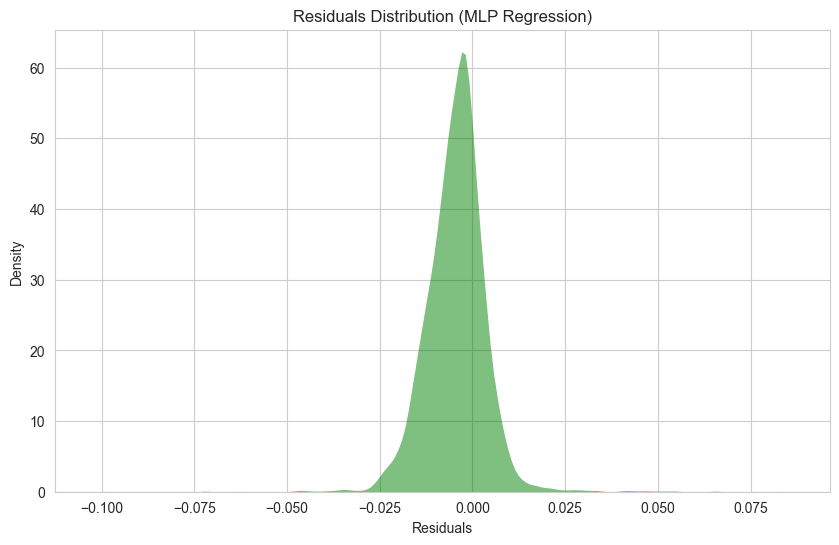

In [18]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.00624506 0.00732765 0.0077197  0.01206735 0.01323928]
Linear Regression Mean RMSE: 0.009319806308484557
MLP Cross-Validation RMSE Scores: [0.00654445 0.00753656 0.00781173 0.01224785 0.01320368]
MLP Mean RMSE: 0.009468854788589262


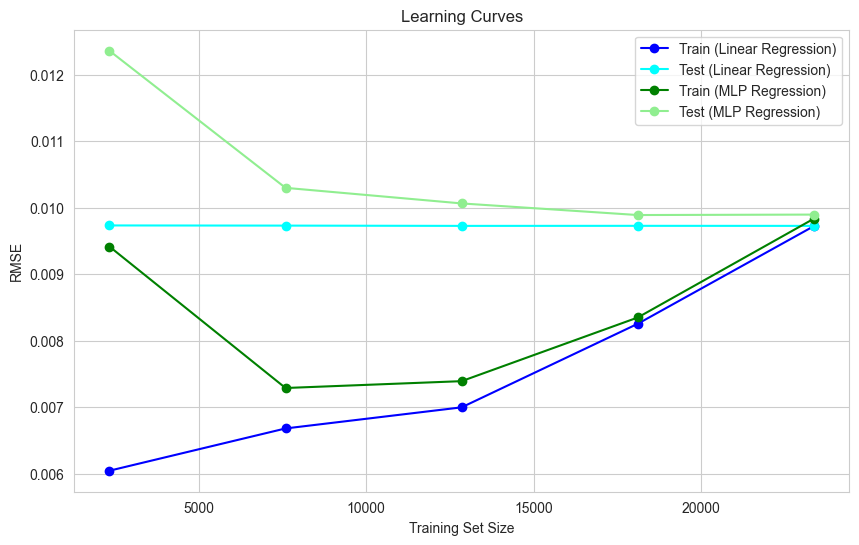

In [19]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990098,0.023810,0.0,0.116262,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.990593,0.071429,0.0,0.116418,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991088,0.119048,0.0,0.116888,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991583,0.166667,0.0,0.117044,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992078,0.214286,0.0,0.117201,0.0,0.0


In [21]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023810,0.0,0.116262,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.116418,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119048,0.0,0.116888,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.117044,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.0,0.117201,0.0,0.0


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [22]:
area_column = food_security_indicators[['Area', 'Year Code']]

food_security_indicators_area_concat = pd.concat([df_normalized, area_column], axis=1)

food_security_indicators_area_concat.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023810,0.0,0.116262,0.0,0.0,Afghanistan,20002002
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.116418,0.0,0.0,Afghanistan,20012003
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119048,0.0,0.116888,0.0,0.0,Afghanistan,20022004
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.117044,0.0,0.0,Afghanistan,20032005
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.0,0.117201,0.0,0.0,Afghanistan,20042006


### Model Deployment

In [23]:
# Train a separate model for each geographical region and save them
regions = food_security_indicators_area_concat['Area'].unique()
for region in regions:
    region_data = food_security_indicators_area_concat[food_security_indicators_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_food_security_indicators/model_food_security_indicators_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Albania.joblib
Model for Algeria saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Algeria.joblib
Model for American Samoa saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_American Samoa.joblib
Model for Andorra saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Andorra.joblib
Model for Angola saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Angola.joblib
Model for Antigua and Barbuda saved as ../model_deployment/model_food_security_indicators/model_food_security_indicators_Antigua and Barbuda.joblib
Model for Argentina saved as ../model_deployment/model_food_security_indicators/model_fo

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025          4.938398
1  2026          4.940782
2  2027          4.943166

Forecast for Albania:
   Year  Forecasted_Value
0  2025         -3.004040
1  2026         -3.005578
2  2027         -3.007115

Forecast for Algeria:
   Year  Forecasted_Value
0  2025          1.735878
1  2026          1.736681
2  2027          1.737485

Forecast for American Samoa:
   Year  Forecasted_Value
0  2025          0.281161
1  2026          0.281249
2  2027          0.281338

Forecast for Andorra:
   Year  Forecasted_Value
0  2025         -0.266534
1  2026         -0.266716
2  2027         -0.266899

Forecast for Angola:
   Year  Forecasted_Value
0  2025          4.170372
1  2026          4.172379
2  2027          4.174385

Forecast for Antigua and Barbuda:
   Year  Forecasted_Value
0  2025          4.872081
1  2026          4.874434
2  2027          4.876787

Forecast for Argentina:
   Year  Forecasted_Value
0  2025          1.261377
1  2026      

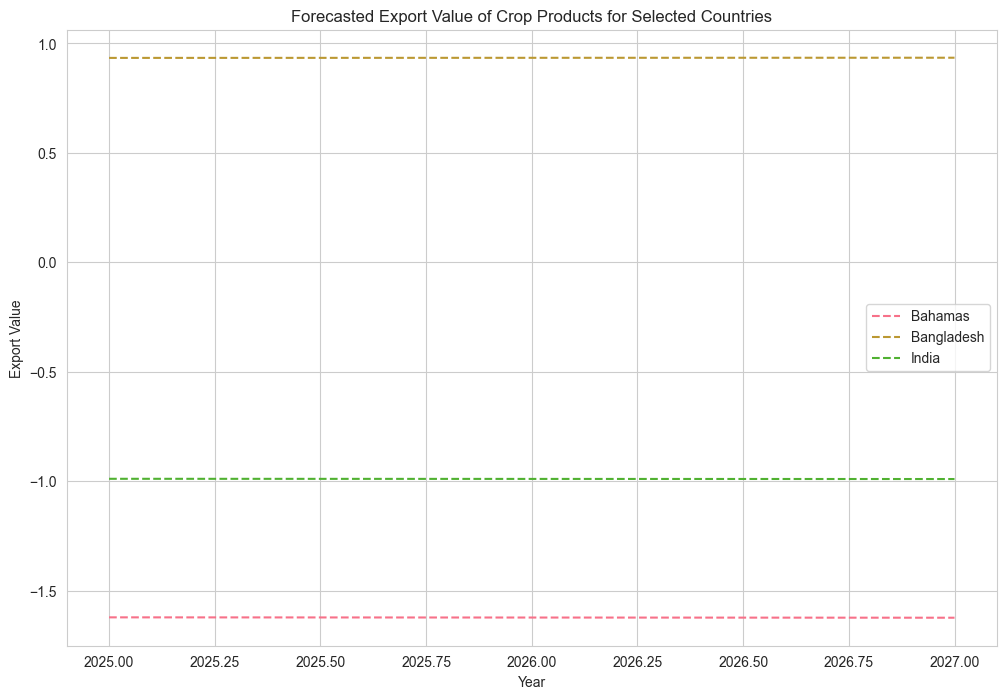

In [24]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_food_security_indicators/model_food_security_indicators_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = food_security_indicators_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Bahamas', 'Bangladesh', 'India']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
